<a href="https://colab.research.google.com/github/schoolkidrich/CUNY_MSDS/blob/main/DATA_622/final/data622_final_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret
# !pip install pycaret-nightly
# !pip install pycaret[full]
# !pip install scikit-learn==0.23

# Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb

# use the state-of-the-art AutoML 
from pycaret.regression import * 

from pycaret.utils import enable_colab 
enable_colab()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Colab mode enabled.


## Loading the data from a csv file into a dataframe (df)

In [ ]:
link = 'https://raw.githubusercontent.com/schoolkidrich/CUNY_MSDS/main/DATA_622/final/Mall_Customers.csv'
df = pd.read_csv(link, index_col = 'CustomerID')

## Defining which fields are categorical variables : Gender

In [ ]:
cat_f = ['Gender']

## Create the model by first creating the setup()

In [ ]:
exp_reg101 = setup(data = df, target = 'Spending Score (1-100)', categorical_features = cat_f,
                   normalize = True, session_id = 809 )

,Description,Value
0,session_id,809
1,Target,Spending Score (1-100)
2,Original Data,"(200, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(139, 3)"


## Comparing the models by MAPE

In [ ]:
best = compare_models(sort = 'MAPE', fold = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,15.4697,503.8743,22.2953,0.2433,0.6954,1.1456,0.5300
lightgbm,Light Gradient Boosting Machine,17.3756,503.2754,22.3680,0.2456,0.7239,1.2237,0.1267
et,Extra Trees Regressor,17.7800,610.1416,24.5235,0.0750,0.7373,1.2487,0.4700
dt,Decision Tree Regressor,17.9815,783.9882,27.9412,-0.1734,0.8439,1.2551,0.0167
xgboost,Extreme Gradient Boosting,18.1073,708.1452,26.5571,-0.0652,0.7529,1.2883,3.7700
ada,AdaBoost Regressor,17.4631,524.5326,22.7857,0.2109,0.7307,1.2902,0.0700
gbr,Gradient Boosting Regressor,17.5061,622.6697,24.8415,0.0673,0.7412,1.3050,0.0533
catboost,CatBoost Regressor,17.2802,614.3936,24.7038,0.0754,0.7561,1.3316,0.3667
lr,Linear Regression,20.6839,603.7185,24.5542,0.0927,0.7943,1.4380,1.1200
lar,Least Angle Regression,20.6839,603.7185,24.5542,0.0927,0.7943,1.4380,0.0167


<!-- ##  Decision Tree Regressor has a -.03 R2. So I'm going to go with other performance metrics:: -->

## Comparing the models by RMSE

In [ ]:
best = compare_models(sort = 'RMSE', fold = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,15.4697,503.8743,22.2953,0.2433,0.6954,1.1456,0.5267
lightgbm,Light Gradient Boosting Machine,17.3756,503.2754,22.3680,0.2456,0.7239,1.2237,0.0233
ada,AdaBoost Regressor,17.4631,524.5326,22.7857,0.2109,0.7307,1.2902,0.0700
knn,K Neighbors Regressor,17.8899,581.9991,23.9525,0.1217,0.7728,1.4763,0.0833
omp,Orthogonal Matching Pursuit,20.6576,597.2983,24.4180,0.1032,0.7986,1.4745,0.0200
lasso,Lasso Regression,20.6250,601.6279,24.5110,0.0962,0.7988,1.4668,0.0233
br,Bayesian Ridge,20.5177,602.0040,24.5212,0.0955,0.7982,1.4585,0.0200
et,Extra Trees Regressor,17.7800,610.1416,24.5235,0.0750,0.7373,1.2487,0.4667
ridge,Ridge Regression,20.6700,603.0957,24.5415,0.0937,0.7944,1.4393,0.0200
lr,Linear Regression,20.6839,603.7185,24.5542,0.0927,0.7943,1.4380,0.0200


## Comparing the models by MSE

In [ ]:
best = compare_models(sort = 'MSE', fold = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17.3756,503.2754,22.3680,0.2456,0.7239,1.2237,0.0267
rf,Random Forest Regressor,15.4697,503.8743,22.2953,0.2433,0.6954,1.1456,0.5333
ada,AdaBoost Regressor,17.4631,524.5326,22.7857,0.2109,0.7307,1.2902,0.0700
knn,K Neighbors Regressor,17.8899,581.9991,23.9525,0.1217,0.7728,1.4763,0.0867
omp,Orthogonal Matching Pursuit,20.6576,597.2983,24.4180,0.1032,0.7986,1.4745,0.0167
lasso,Lasso Regression,20.6250,601.6279,24.5110,0.0962,0.7988,1.4668,0.0200
br,Bayesian Ridge,20.5177,602.0040,24.5212,0.0955,0.7982,1.4585,0.0167
ridge,Ridge Regression,20.6700,603.0957,24.5415,0.0937,0.7944,1.4393,0.0200
lar,Least Angle Regression,20.6839,603.7185,24.5542,0.0927,0.7943,1.4380,0.0167
lr,Linear Regression,20.6839,603.7185,24.5542,0.0927,0.7943,1.4380,0.0200


## Seems to be the obvious choice is Random Forest Regressor. But if I compare that of XGBoost in the previous collab notebook, I can much lower MAPE, RMSE, MSE with XGBoost. So I'm going to build an XGBoost model

In [ ]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,21.0351,1107.4024,33.2777,-0.5419,1.1897,5.6117
1,16.5393,653.9552,25.5725,-0.4198,0.6834,0.9271
2,19.2904,698.4741,26.4287,-0.0286,0.6571,0.3109
3,12.0130,264.1184,16.2517,0.4879,0.3034,0.2554
4,14.7735,404.8424,20.1207,0.1132,0.7584,0.9694
5,16.0015,617.7478,24.8545,-0.1126,0.4582,0.4580
6,22.4744,1099.3208,33.1560,-0.4598,0.8302,1.2383
7,27.1072,1312.5315,36.2289,-0.1087,0.9804,1.2616
8,11.9694,260.5782,16.1424,0.2959,0.5918,0.6021
9,10.0345,229.1955,15.1392,0.6505,0.4362,0.2218


Now I try to tune my model

In [ ]:
tuned_xgb = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18.9100,583.9465,24.1650,0.1869,0.9595,3.5694
1,15.6722,384.8419,19.6174,0.1645,0.6428,0.7776
2,24.9370,877.2153,29.6178,-0.2918,0.5397,0.4312
3,15.4289,457.0175,21.3780,0.1139,0.5621,0.5209
4,10.6496,207.1534,14.3928,0.5462,0.5884,0.7018
5,17.2825,374.5941,19.3544,0.3254,0.5097,0.5524
6,16.4992,438.9794,20.9518,0.4171,0.5635,0.6281
7,25.5401,918.8667,30.3128,0.2238,0.8910,1.4104
8,15.2485,276.4389,16.6265,0.2531,0.5388,0.5918
9,13.7205,352.3973,18.7722,0.4626,0.3707,0.3007


In [ ]:
print(tuned_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=809, reg_alpha=0.1, reg_lambda=1,
             scale_pos_weight=12.8, subsample=0.2, tree_method='auto',
             validate_parameters=1, verbosity=0)


# Residual Plot

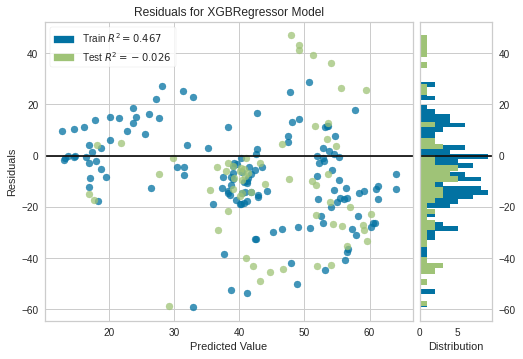

In [ ]:
plot_model(tuned_xgb)

# Prediction error plot

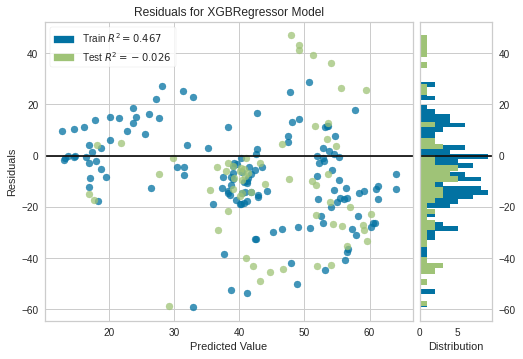

In [ ]:
plot_model(tuned_xgb)

# Feature importance plot

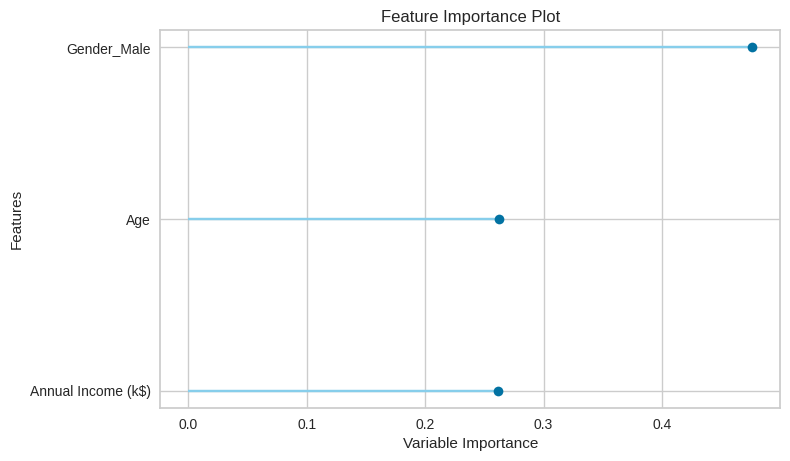

In [ ]:
plot_model(tuned_xgb, plot = 'feature')

## Evaluate the model with other plots like Cooks Distance

In [ ]:
evaluate_model(tuned_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,19.9534,629.3393,25.0866,-0.0264,0.6893,1.3214


,Age,Annual Income (k$),Gender_Male,Spending Score (1-100),Label
0,0.014898,-1.215853,0.0,31,29.897837
1,-0.056511,0.322291,1.0,91,46.639347
2,-1.413281,-1.523482,1.0,66,36.787304
3,-0.342147,-1.254307,1.0,61,51.171329
4,-0.627783,0.783734,0.0,93,59.630264
...,...,...,...,...,...
56,0.657579,0.053116,1.0,56,41.730240
57,-1.341872,-1.062039,0.0,81,54.397385
58,-0.627783,-0.831317,0.0,61,53.677460
59,-1.341872,-0.254513,0.0,57,47.701839


# Finalizing model for deployment

In [ ]:
final_xgb = finalize_model(tuned_xgb)
print(final_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=220, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=809, reg_alpha=0.1, reg_lambda=1,
             scale_pos_weight=12.8, subsample=0.2, tree_method='auto',
             validate_parameters=1, verbosity=0)


#### Final Performance Metrics is as follows,

In [ ]:
predict_model(final_xgb)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,15.4386,409.8624,20.2451,0.3316,0.5737,0.8946


,Age,Annual Income (k$),Gender_Male,Spending Score (1-100),Label
0,0.014898,-1.215853,0.0,31,27.728096
1,-0.056511,0.322291,1.0,91,53.790718
2,-1.413281,-1.523482,1.0,66,52.710514
3,-0.342147,-1.254307,1.0,61,51.134125
4,-0.627783,0.783734,0.0,93,65.367310
...,...,...,...,...,...
56,0.657579,0.053116,1.0,56,42.739555
57,-1.341872,-1.062039,0.0,81,61.695377
58,-0.627783,-0.831317,0.0,61,51.197853
59,-1.341872,-0.254513,0.0,57,48.964195


## For this regression problem, the final XGB model has a $R^{2}$ of 33.16%, up from 19.68% prior to tuning. RMSE and MSE also improved. But MAPE did not.